In [2]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from datetime import datetime
import pickle
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('../data/cases_train_processed.csv')
df = df.drop(['Country_Region'], axis=1)


test = pd.read_csv('../data/cases_test_processed.csv')
test = test.drop(['Country_Region'], axis=1)
le = LabelEncoder()
X_encoded = pd.get_dummies(df, columns=['combined_key', 'sex'])
X_encoded = X_encoded.drop(['outcome'], axis=1)
test = pd.get_dummies(test, columns=['combined_key', 'sex'])

ModuleNotFoundError: No module named 'xgboost'

In [191]:
common_cols = list(set(X_encoded.columns).intersection(test.columns))
X_encoded = X_encoded[common_cols]
test = test[common_cols]

In [ ]:
X_encoded

,combined_key_Jammu and Kashmir_India,combined_key_Sergipe_Brazil,combined_key_Oregon_United States,combined_key_Maranhao_Brazil,combined_key_Sardegna_Italy,combined_key_Vastra Gotaland_Sweden,combined_key_Djibouti,combined_key_Huila_Colombia,combined_key_Fujian_China,combined_key_Assam_India,...,combined_key_Guyana,combined_key_Malta,combined_key_Groningen_Netherlands,combined_key_Melilla_Spain,combined_key_Democratic Republic of the Congo,combined_key_Sucre_Colombia,combined_key_Namibia,combined_key_Inner Mongolia_China,combined_key_Cusco_Peru,combined_key_Guinea
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346193,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
346194,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
346195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
346196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [192]:
y = df['outcome'].copy()

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y , test_size=0.2, random_state=42)
X_train

,combined_key_Maine_United States,combined_key_Hainan_China,combined_key_Mississippi_United States,combined_key_Ethiopia,combined_key_Cusco_Peru,combined_key_Amazonas_Colombia,combined_key_Pais Vasco_Spain,combined_key_Sicilia_Italy,combined_key_Bolivar_Colombia,combined_key_Pernambuco_Brazil,combined_key_Toscana_Italy,combined_key_Shandong_China,combined_key_Estonia,combined_key_Delaware_United States,combined_key_Osaka_Japan,combined_key_Zambia,combined_key_Gujarat_India,combined_key_Aragon_Spain,combined_key_Queensland_Australia,combined_key_Lima_Peru,combined_key_Puducherry_India,combined_key_San Luis Potosi_Mexico,combined_key_Austria,combined_key_West Virginia_United States,combined_key_Louisiana_United States,combined_key_Tamil Nadu_India,combined_key_Quindio_Colombia,combined_key_Singapore,combined_key_Nova Scotia_Canada,combined_key_Chandigarh_India,combined_key_Meghalaya_India,combined_key_Asturias_Spain,combined_key_Sindh_Pakistan,combined_key_Atlantico_Colombia,combined_key_Parana_Brazil,combined_key_Philippines,combined_key_Goa_India,combined_key_Colima_Mexico,combined_key_Rhode Island_United States,combined_key_Putumayo_Colombia,...,combined_key_California_United States,combined_key_Madagascar,combined_key_Schleswig-Holstein_Germany,combined_key_Jammu and Kashmir_India,combined_key_Nigeria,combined_key_Karnataka_India,combined_key_Ontario_Canada,combined_key_Blekinge_Sweden,combined_key_Delhi_India,combined_key_Tokyo_Japan,combined_key_Huila_Colombia,combined_key_Jamtland Harjedalen_Sweden,combined_key_Maranhao_Brazil,combined_key_Tumbes_Peru,combined_key_Tolima_Colombia,Case-Fatality_Ratio,combined_key_San Marino,combined_key_Junin_Peru,combined_key_Mozambique,combined_key_Tabasco_Mexico,combined_key_Rajasthan_India,combined_key_Bremen_Germany,combined_key_Bihar_India,combined_key_Campania_Italy,combined_key_Drenthe_Netherlands,combined_key_Serbia,combined_key_Distrito Federal_Brazil,combined_key_Gavleborg_Sweden,combined_key_Tianjin_China,combined_key_Eswatini,combined_key_Equatorial Guinea,combined_key_Gansu_China,combined_key_Nordrhein-Westfalen_Germany,combined_key_Iowa_United States,combined_key_Slovenia,combined_key_Uppsala_Sweden,combined_key_Piemonte_Italy,combined_key_Ireland,combined_key_Tennessee_United States,combined_key_Northern Ireland_United Kingdom
10922,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.235410,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
221866,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.723007,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
54744,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.272727,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
58879,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2.054617,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
191661,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.855833,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.107655,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
259178,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.723007,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
131932,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0

## Decision Tree Tuning

In [1]:
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics,tree

scorer = make_scorer(f1_score)

model_params = {
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2','None'],
    'max_depth': [20,23,25,27]
}

gs = GridSearchCV(tree.DecisionTreeClassifier(random_state=42), n_jobs = -1, cv=3,
                  param_grid=model_params,
                  verbose=2,
                  scoring='f1_weighted', return_train_score=True)
gs.fit(X_train, y_train)
results = gs.cv_results_
gs.best_params_

NameError: name 'X_train' is not defined

In [198]:
# Make predictions using the new model.
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
model = tree.DecisionTreeClassifier(criterion='gini',max_depth=25,max_features = 'sqrt').fit(X_train,y_train)
best_train_predictions = model.predict(X_train)
best_test_predictions = model.predict(X_test)


# Calculate the f1_score of the new model.
print('The training F1 Score is', f1_score(best_train_predictions, y_train,average=None, labels=['deceased', 'hospitalized', 'recovered', 'nonhospitalized']))
print('The testing F1 Score is', f1_score(best_test_predictions, y_test, average=None, labels=['deceased', 'hospitalized', 'recovered', 'nonhospitalized']))

# Calculate the accuracy of the new model.
print('The training accuracy Score is',accuracy_score(best_train_predictions, y_train))
print('The testing accuracy Score is', accuracy_score(best_test_predictions, y_test))

# Calculate the recall of the new model.
print('The training Recall Score is', recall_score(best_train_predictions, y_train,average=None, labels=['deceased', 'hospitalized', 'recovered', 'nonhospitalized']))
print('The testing Recall Score is', recall_score(best_test_predictions, y_test, average=None, labels=['deceased', 'hospitalized', 'recovered', 'nonhospitalized']))

# Calculate the precision of the new model
print('The training precision Score is', precision_score(best_train_predictions, y_train,average=None, labels=['deceased', 'hospitalized', 'recovered', 'nonhospitalized']))
print('The testing precision Score is', precision_score(best_test_predictions, y_test, average=None, labels=['deceased', 'hospitalized', 'recovered', 'nonhospitalized']))

The training F1 Score is [0.34550884 0.78959482 0.57519075 0.99411566]
The testing F1 Score is [0.09922179 0.76106195 0.50533041 0.98734746]
The training accuracy Score is 0.8233292361336538
The testing accuracy Score is 0.794070875217017
The training Recall Score is [0.87340302 0.69578006 0.7738383  0.99271817]
The testing Recall Score is [0.25247525 0.67138559 0.67979212 0.98565022]
The training precision Score is [0.21534937 0.91265116 0.45769781 0.99551709]
The testing precision Score is [0.06174334 0.87838734 0.40212829 0.98905055]


In [199]:
DecisionTree_final_report = pd.DataFrame(columns=('criterion', 'max_features', 'max_depth',
                                             'F1_deceased', 'Recall_deceased', 'Accuracy', 'Recall'))

In [200]:
dtParaSet = []
for criterion in ['gini','entropy']:
  for depth in [20,23,25,27]:
    for features in [None,'sqrt','log2']:
      dtParaSet.append([criterion,depth,features])


In [201]:
from sklearn.metrics import classification_report
for i in range(len(dtParaSet)):
  print(i)
  paraSet = dtParaSet[i]
  clf_DecisionTree = tree.DecisionTreeClassifier(random_state=42,criterion =paraSet[0], max_depth= paraSet[1], max_features= paraSet[2]).fit(X_train,y_train)

  best_train_predictions =clf_DecisionTree.predict(X_train)
  best_test_predictions = clf_DecisionTree.predict(X_test)

  # get reports
  target_names = ['deceased', 'hospitalized', 'non-hosp', 'recovered']
  report = classification_report(best_test_predictions, y_test, target_names=target_names, output_dict=True)

  DecisionTree_final_report.loc[i] = [paraSet[0], paraSet[1], paraSet[2],
              report['deceased']['f1-score'], report['deceased']['recall'], report['accuracy'], report['weighted avg']['recall']]



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


In [202]:
# export to csv
DecisionTree_final_report.to_csv ('DecisionTree_tuning.csv', index = False, header=True)

In [205]:
y = df['outcome'].copy()


model = tree.DecisionTreeClassifier(random_state=42,criterion='gini',max_depth=25,max_features = 'sqrt').fit(X_encoded,y)

test = test.fillna(test.mean())

final_predictions = model.predict(test)

print(np.unique(final_predictions, return_counts=True))

np.savetxt('DecisionTreepredictions.txt', final_predictions, fmt='%s')



(array(['deceased', 'hospitalized', 'nonhospitalized', 'recovered'],
      dtype=object), array([  448, 17345, 21206,  7501]))


2
4
6
8
10
12
14
16
18
20
22
24
26
28
30


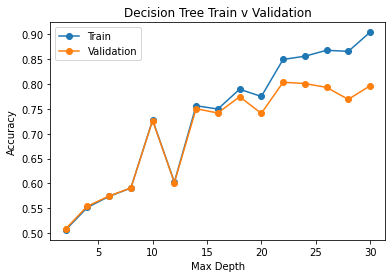

In [206]:
values = [i for i in range(2,31,2)]
train_scores, test_scores = list(), list()
for i in values:
    print(i)
    model = tree.DecisionTreeClassifier(random_state=42,criterion='gini',max_depth=i,max_features = 'sqrt').fit(X_train,y_train)


    train_yhat = model.predict(X_train)
    train_acc = metrics.accuracy_score(y_train,train_yhat)
    train_scores.append(train_acc)

    test_yhat = model.predict(X_test)
    test_acc = metrics.accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)

plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Validation')
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Train v Validation')
plt.show()


              precision    recall  f1-score   support

    deceased       0.13      0.10      0.11       826
hospitalized       0.71      0.80      0.75     24134
    non-hosp       0.99      0.99      0.99     26668
   recovered       0.64      0.52      0.57     16915

    accuracy                           0.80     68543
   macro avg       0.61      0.60      0.61     68543
weighted avg       0.79      0.80      0.79     68543



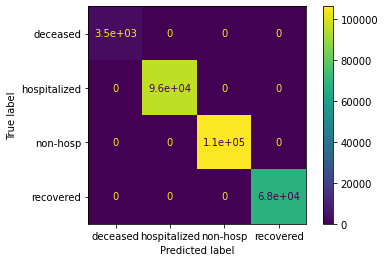

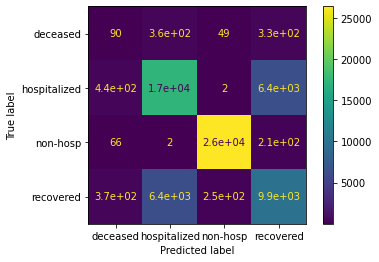

In [207]:
from sklearn.metrics import plot_confusion_matrix, classification_report
model =  tree.DecisionTreeClassifier(random_state=42).fit(X_train,y_train)
target_names = ['deceased', 'hospitalized', 'non-hosp', 'recovered']

print(classification_report(y_test, test_yhat, target_names=target_names))

plot_confusion_matrix(model, X_train, y_train,
                     display_labels=target_names)
plot_confusion_matrix(model, X_test, y_test,
                     display_labels=target_names)

## Initial Performance of Random Forest With only paramater tuning

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV

# create random forest classifier model
rf_model = RandomForestClassifier(random_state=42)

# scoring = {
#   'f1_score': make_scorer(f1_score),
#   'recall_score': make_scorer(recall_score),
#  'accuracy_score': make_scorer(accuracy_score)
# }
scorer = make_scorer(f1_score)

model_params = {
    'n_estimators': [10, 20, 30, 50],
    'max_features': ['sqrt', 'log2', 0.25, 0.5],
    'min_samples_split': [10, 20, 40],
    'max_depth': [10, 20, 30]
}

gs = GridSearchCV(RandomForestClassifier(random_state=42), n_jobs = -1, cv=3,
                  param_grid=model_params,
                  verbose=2,
                  scoring='f1_weighted', return_train_score=True)
gs.fit(X_train, y_train)
results = gs.cv_results_

Fitting 3 folds for each of 144 candidates, totalling 432 fits


In [ ]:
# Make predictions using the new model.
best_train_predictions =gs.predict(X_train)
best_test_predictions = gs.predict(X_test)

# Calculate the f1_score of the new model.
print('The training F1 Score is', f1_score(best_train_predictions, y_train,average=None, labels=['deceased', 'hospitalized', 'recovered', 'nonhospitalized']))
print('The testing F1 Score is', f1_score(best_test_predictions, y_test, average=None, labels=['deceased', 'hospitalized', 'recovered', 'nonhospitalized']))

The training F1 Score is [0.21025901 0.84968067 0.77479672 0.99556138]
The testing F1 Score is [0.10295728 0.8187272  0.71994631 0.99135356]


## Visualize Class Imbalance

Initial Counts:
hospitalized       118586
nonhospitalized    111612
recovered           86447
deceased             4343
Name: outcome, dtype: int64


<AxesSubplot:title={'center':'Count (target)'}>

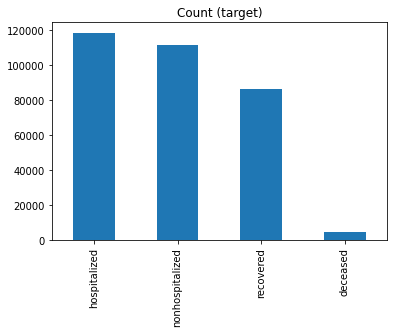

In [ ]:
print('Initial Counts:')
print(df.outcome.value_counts())

df.outcome.value_counts().plot(kind='bar', title='Count (outcome)')

## Random Up sampling of Deceased Class

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV

Before Sampling Counts:
nonhospitalized    136536
hospitalized       120552
recovered           84792
deceased             4318
Name: outcome, dtype: int64
After Sampling Counts:
nonhospitalized    109148
deceased           109148
hospitalized        96509
recovered           67826
Name: outcome, dtype: int64


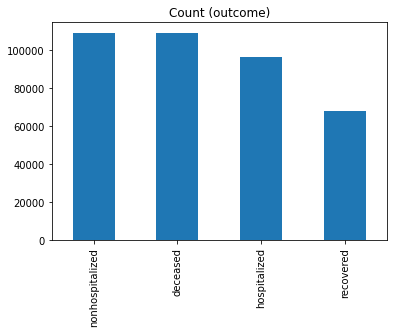

In [ ]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler

y = df['outcome'].copy()

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y , test_size=0.2, random_state=42)
X_train

ros = RandomOverSampler(sampling_strategy='minority')
X_ros, y_ros = ros.fit_resample(X_train, y_train)
print('Before Sampling Counts:')
print(y.value_counts())
print('After Sampling Counts:')
y_ros.value_counts().plot(kind='bar', title='Count (outcome)')
print(y_ros.value_counts())


In [ ]:
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV

# scoring = {
#   'f1_score': make_scorer(f1_score),
#   'recall_score': make_scorer(recall_score),
#  'accuracy_score': make_scorer(accuracy_score)
# }
scorer = make_scorer(f1_score)

model_params = {
    'n_estimators': [50, 75, 100],
    'max_features': ['sqrt', 'log2', 0.5],
    'max_depth': [20, 30, 40]
}

gs_sample = GridSearchCV(RandomForestClassifier(random_state=42), n_jobs = -1, cv=3,
                  param_grid=model_params,
                  verbose=2,
                  scoring='f1_weighted', return_train_score=True)
gs_sample.fit(X_ros, y_ros)
results_sample = gs_sample.cv_results_

Fitting 3 folds for each of 27 candidates, totalling 81 fits


In [ ]:
gs_sample.best_params_

{'max_depth': 30, 'max_features': 0.5, 'n_estimators': 75}

In [ ]:
# Make predictions using the new model.
best_train_predictions = gs_sample.predict(X_ros)
best_test_predictions = gs_sample.predict(X_test)

In [ ]:
# Calculate the f1_score of the new model.
print('The training F1 Score is', f1_score(best_train_predictions, y_ros,average=None, labels=['deceased', 'hospitalized', 'recovered', 'nonhospitalized']))
print('The testing F1 Score is', f1_score(best_test_predictions, y_test, average=None, labels=['deceased', 'hospitalized', 'recovered', 'nonhospitalized']))

# Calculate the accuracy of the new model.
print('The training accuracy Score is',accuracy_score(best_train_predictions, y_ros))
print('The testing accuracy Score is', accuracy_score(best_test_predictions, y_test))

# Calculate the recall of the new model.
print('The training Recall Score is', recall_score(best_train_predictions, y_ros,average=None, labels=['deceased', 'hospitalized', 'recovered', 'nonhospitalized']))
print('The testing Recall Score is', recall_score(best_test_predictions, y_test, average=None, labels=['deceased', 'hospitalized', 'recovered', 'nonhospitalized']))

# Calculate the precision of the new model
print('The training precision Score is', precision_score(best_train_predictions, y_ros,average=None, labels=['deceased', 'hospitalized', 'recovered', 'nonhospitalized']))
print('The testing precision Score is', precision_score(best_test_predictions, y_test, average=None, labels=['deceased', 'hospitalized', 'recovered', 'nonhospitalized']))

The training F1 Score is [0.99838419 0.98365749 0.97744822 0.9999944 ]
The testing F1 Score is [0.12247256 0.78336525 0.69321681 0.99061138]
The training accuracy Score is 0.9906472794958263
The testing accuracy Score is 0.8223776441633696
The training Recall Score is [0.99677358 0.97925831 0.9858085  1.        ]
The testing Recall Score is [0.1192351  0.7743077  0.70594911 0.9904779 ]
The training precision Score is [1.         0.98809637 0.96922854 0.99998881]
The testing precision Score is [0.12589074 0.79263721 0.68093565 0.9907449 ]


## Evaluating F1 Score only for deceased

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV

# scoring = {
#   'f1_score': make_scorer(f1_score),
#   'recall_score': make_scorer(recall_score),
#  'accuracy_score': make_scorer(accuracy_score)
# }
scorer = make_scorer(f1_score, average=None, labels=['deceased'])

model_params = {
    'n_estimators': [50, 75, 100],
    'max_features': ['sqrt', 0.75, 0.5],
    'max_depth': [20, 30, 40]
}

gs_sample_d = GridSearchCV(RandomForestClassifier(random_state=42), n_jobs = -1, cv=3,
                  param_grid=model_params,
                  verbose=2,
                  scoring=scorer, return_train_score=True)
gs_sample_d.fit(X_ros, y_ros)
results_sample_d = gs_sample_d.cv_results_

Fitting 3 folds for each of 27 candidates, totalling 81 fits


In [ ]:
gs_sample_d.best_params_

{'max_depth': 40, 'max_features': 'sqrt', 'n_estimators': 100}

In [ ]:
# Make predictions using the new model.
best_train_predictions = gs_sample_d.predict(X_ros)
best_test_predictions = gs_sample_d.predict(X_test)

In [ ]:
# Calculate the f1_score of the new model.
print('The training F1 Score is', f1_score(best_train_predictions, y_ros,average=None, labels=['deceased', 'hospitalized', 'recovered', 'nonhospitalized']))
print('The testing F1 Score is', f1_score(best_test_predictions, y_test, average=None, labels=['deceased', 'hospitalized', 'recovered', 'nonhospitalized']))

# Calculate the accuracy of the new model.
print('The training accuracy Score is',accuracy_score(best_train_predictions, y_ros))
print('The testing accuracy Score is', accuracy_score(best_test_predictions, y_test))

# Calculate the recall of the new model.
print('The training Recall Score is', recall_score(best_train_predictions, y_ros,average=None, labels=['deceased', 'hospitalized', 'recovered', 'nonhospitalized']))
print('The testing Recall Score is', recall_score(best_test_predictions, y_test, average=None, labels=['deceased', 'hospitalized', 'recovered', 'nonhospitalized']))

# Calculate the precision of the new model
print('The training precision Score is', precision_score(best_train_predictions, y_ros,average=None, labels=['deceased', 'hospitalized', 'recovered', 'nonhospitalized']))
print('The testing precision Score is', precision_score(best_test_predictions, y_test, average=None, labels=['deceased', 'hospitalized', 'recovered', 'nonhospitalized']))

The training F1 Score is [0.99997891 0.99924628 0.99899378 1.        ]
The testing F1 Score is [0.10375    0.77153824 0.67855686 0.99039152]
The training accuracy Score is 0.9995892386265058
The testing accuracy Score is 0.8142932801644911
The training Recall Score is [0.99995783 0.99906197 0.9992759  1.        ]
The testing Recall Score is [0.10949868 0.7642683  0.68656012 0.98976936]
The training precision Score is [1.         0.99943065 0.99871183 1.        ]
The testing precision Score is [0.09857482 0.77894781 0.67073803 0.99101447]


## Balanced Subsample Class Weights + Random Oversampling

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV

# scoring = {
#   'f1_score': make_scorer(f1_score),
#   'recall_score': make_scorer(recall_score),
#  'accuracy_score': make_scorer(accuracy_score)
# }
scorer = make_scorer(f1_score, average=None, labels=['deceased'])

model_params = {
    'n_estimators': [75, 100, 150],
    'max_features': ['sqrt', 'log2', 0.5],
    'max_depth': [20, 30, 40]
}

gs_sample_weights = GridSearchCV(RandomForestClassifier(random_state=42, class_weight='balanced_subsample'), n_jobs = -1, cv=3,
                  param_grid=model_params,
                  verbose=2,
                  scoring='f1_weighted', return_train_score=True)
gs_sample_weights.fit(X_ros, y_ros)
results_sample_weights = gs_sample_weights.cv_results_

Fitting 3 folds for each of 27 candidates, totalling 81 fits


In [ ]:
print(gs_sample_weights.best_params_)

{'max_depth': 30, 'max_features': 0.5, 'n_estimators': 100}


In [ ]:
# Make predictions using the new model.
best_train_predictions = gs_sample_weights.predict(X_ros)
best_test_predictions = gs_sample_weights.predict(X_test)

In [ ]:
# Calculate the f1_score of the new model.
print('The training F1 Score is', f1_score(best_train_predictions, y_ros,average=None, labels=['deceased', 'hospitalized', 'recovered', 'nonhospitalized']))
print('The testing F1 Score is', f1_score(best_test_predictions, y_test, average=None, labels=['deceased', 'hospitalized', 'recovered', 'nonhospitalized']))

# Calculate the accuracy of the new model.
print('The training accuracy Score is',accuracy_score(best_train_predictions, y_ros))
print('The testing accuracy Score is', accuracy_score(best_test_predictions, y_test))

# Calculate the recall of the new model.
print('The training Recall Score is', recall_score(best_train_predictions, y_ros,average=None, labels=['deceased', 'hospitalized', 'recovered', 'nonhospitalized']))
print('The testing Recall Score is', recall_score(best_test_predictions, y_test, average=None, labels=['deceased', 'hospitalized', 'recovered', 'nonhospitalized']))

# Calculate the precision of the new model
print('The training precision Score is', precision_score(best_train_predictions, y_ros,average=None, labels=['deceased', 'hospitalized', 'recovered', 'nonhospitalized']))
print('The testing precision Score is', precision_score(best_test_predictions, y_test, average=None, labels=['deceased', 'hospitalized', 'recovered', 'nonhospitalized']))

The training F1 Score is [0.99836842 0.98499886 0.97983271 0.9999944 ]
The testing F1 Score is [0.12858783 0.78082077 0.69548088 0.99034142]
The training accuracy Score is 0.9914688022428145
The testing accuracy Score is 0.8216766877472819
The training Recall Score is [0.99674216 0.98798184 0.97798189 1.        ]
The testing Recall Score is [0.12444444 0.77866209 0.69941152 0.99025245]
The training precision Score is [1.         0.98203384 0.98169055 0.99998881]
The testing precision Score is [0.13301663 0.78299145 0.69159417 0.99043041]


## Just Balanced Subsample Class Weights

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV

# scoring = {
#   'f1_score': make_scorer(f1_score),
#   'recall_score': make_scorer(recall_score),
#  'accuracy_score': make_scorer(accuracy_score)
# }
scorer = make_scorer(f1_score)

model_params = {
    'n_estimators': [50, 75, 100],
    'max_features': ['sqrt', 'log2', 0.5],
    'max_depth': [20, 30, 40]
}


gs_weights = GridSearchCV(RandomForestClassifier(random_state=42, class_weight='balanced_subsample'), n_jobs = -1, cv=3,
                  param_grid=model_params,
                  verbose=2,
                  scoring='f1_weighted', return_train_score=True)
gs_weights.fit(X_train, y_train)
results_weights = gs_weights.cv_results_

Fitting 3 folds for each of 27 candidates, totalling 81 fits


In [ ]:
print(gs_weights.best_params_)

{'max_depth': 20, 'max_features': 0.5, 'n_estimators': 100}


In [ ]:
# Make predictions using the new model.
best_train_predictions = gs_weights.predict(X_train)
best_test_predictions = gs_weights.predict(X_test)

In [ ]:
# Calculate the f1_score of the new model.
print('The training F1 Score is', f1_score(best_train_predictions, y_train,average=None, labels=['deceased', 'hospitalized', 'recovered', 'nonhospitalized']))
print('The testing F1 Score is', f1_score(best_test_predictions, y_test, average=None, labels=['deceased', 'hospitalized', 'recovered', 'nonhospitalized']))

# Calculate the accuracy of the new model.
print('The training accuracy Score is',accuracy_score(best_train_predictions, y_train))
print('The testing accuracy Score is', accuracy_score(best_test_predictions, y_test))

# Calculate the recall of the new model.
print('The training Recall Score is', recall_score(best_train_predictions, y_train,average=None, labels=['deceased', 'hospitalized', 'recovered', 'nonhospitalized']))
print('The testing Recall Score is', recall_score(best_test_predictions, y_test, average=None, labels=['deceased', 'hospitalized', 'recovered', 'nonhospitalized']))

# Calculate the precision of the new model
print('The training precision Score is', precision_score(best_train_predictions, y_train,average=None, labels=['deceased', 'hospitalized', 'recovered', 'nonhospitalized']))
print('The testing precision Score is', precision_score(best_test_predictions, y_test, average=None, labels=['deceased', 'hospitalized', 'recovered', 'nonhospitalized']))

The training F1 Score is [0.40763339 0.83857311 0.80519813 0.99858232]
The testing F1 Score is [0.12401414 0.77818587 0.72579503 0.99102988]
The training accuracy Score is 0.8721056115892364
The testing accuracy Score is 0.8187794012274525
The training Recall Score is [0.26375472 0.89157027 0.79121493 0.99996633]
The testing Recall Score is [0.08042328 0.82515106 0.71368902 0.99181029]
The training precision Score is [0.8968866  0.79152301 0.81968447 0.99720214]
The testing precision Score is [0.27078385 0.73627901 0.73831883 0.9902507 ]


In [ ]:
print(results_weights)

{'mean_fit_time': array([ 30.22960337,  43.85004934,  58.32153893,  29.17331243,
        38.65406203,  51.06164869,  62.65747786,  88.22866988,
       118.17556206,  30.66164033,  46.14197048,  62.60205046,
        31.44720507,  43.17418043,  56.19299531,  61.43080997,
        91.20851421, 127.31365021,  32.38034542,  48.37106713,
        64.76092156,  31.46007339,  44.91737636,  58.24986084,
        60.69025159,  75.78736305,  89.15874879]), 'std_fit_time': array([1.69061543, 0.75110125, 2.36150403, 0.81193807, 0.60126756,
       0.24730767, 0.33944084, 2.37259839, 2.59718419, 0.2176365 ,
       0.52242432, 0.13350308, 1.25508805, 0.89229642, 0.66822726,
       1.16946183, 2.53455725, 0.93854698, 1.23326243, 0.55521479,
       1.73386859, 0.44737121, 0.66131482, 0.44576109, 0.31652699,
       0.559656  , 0.31106749]), 'mean_score_time': array([2.10390949, 2.84509945, 3.24861495, 2.25471314, 2.79768443,
       3.30214016, 1.89706532, 2.46356885, 3.30866941, 2.55084864,
       3.3406984

## Final Model Tuning + Evaluation

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV

scoring = {
  'deceased_f1': make_scorer(f1_score, average=None, labels=['deceased']),
  'overall_f1': make_scorer(f1_score, average='weighted'),
  'deceased_recall': make_scorer(f1_score, average=None, labels=['deceased']),
  'overall_recall': make_scorer(recall_score, average='weighted'),
 'overall_accuracy': make_scorer(accuracy_score)
}

model_params = {
    'n_estimators': [80, 90, 100],
    'max_features': ['sqrt', 'log2', 0.5],
    'max_depth': [25, 30, 35]
}

gs = GridSearchCV(RandomForestClassifier(random_state=42, class_weight='balanced_subsample'), n_jobs = -1, cv=3,
                  param_grid=model_params,
                  verbose=2,
                  scoring=scoring, refit='overall_f1', return_train_score=True)
gs.fit(X_ros, y_ros)
results = gs.cv_results_
print(gs.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


In [ ]:
params_df = pd.DataFrame(gs.cv_results_)
print(params_df.params)

rf_param_set1 = params_df.params[0]
print(rf_param_set1)

0     {'max_depth': 25, 'max_features': 'sqrt', 'n_e...
1     {'max_depth': 25, 'max_features': 'sqrt', 'n_e...
2     {'max_depth': 25, 'max_features': 'sqrt', 'n_e...
3     {'max_depth': 25, 'max_features': 'log2', 'n_e...
4     {'max_depth': 25, 'max_features': 'log2', 'n_e...
5     {'max_depth': 25, 'max_features': 'log2', 'n_e...
6     {'max_depth': 25, 'max_features': 0.5, 'n_esti...
7     {'max_depth': 25, 'max_features': 0.5, 'n_esti...
8     {'max_depth': 25, 'max_features': 0.5, 'n_esti...
9     {'max_depth': 30, 'max_features': 'sqrt', 'n_e...
10    {'max_depth': 30, 'max_features': 'sqrt', 'n_e...
11    {'max_depth': 30, 'max_features': 'sqrt', 'n_e...
12    {'max_depth': 30, 'max_features': 'log2', 'n_e...
13    {'max_depth': 30, 'max_features': 'log2', 'n_e...
14    {'max_depth': 30, 'max_features': 'log2', 'n_e...
15    {'max_depth': 30, 'max_features': 0.5, 'n_esti...
16    {'max_depth': 30, 'max_features': 0.5, 'n_esti...
17    {'max_depth': 30, 'max_features': 0.5, 'n_

In [ ]:
rf_final_report = pd.DataFrame(columns=('n_estimators', 'max_features', 'max_depth', 
                                             'F1_deceased', 'Recall_deceased', 'Accuracy', 'Recall'))

In [ ]:
from sklearn.metrics import plot_confusion_matrix, classification_report, f1_score

n = len(params_df.params)

for k in range(n):
    rf_param_set = params_df.params[k]
    clf_rf = RandomForestClassifier(random_state=42,
                                n_jobs=-1,
                                class_weight='balanced_subsample',
                                n_estimators=rf_param_set['n_estimators'],
                                max_depth=rf_param_set['max_depth'],
                                max_features=rf_param_set['max_features'])
    clf_rf.fit(X_ros, 
                y_ros
               )
    # Make predictions using the new model.
    best_train_predictions =clf_rf.predict(X_ros)
    best_test_predictions = clf_rf.predict(X_test)

    # get reports
    target_names = ['deceased', 'hospitalized', 'non-hospitalized', 'recovered']
    report = classification_report(best_train_predictions, y_ros, target_names=target_names, output_dict=True)

    rf_final_report.loc[k] = [rf_param_set['n_estimators'], rf_param_set['max_features'], rf_param_set['max_depth'],
                report['deceased']['f1-score'], report['deceased']['recall'], report['accuracy'], report['weighted avg']['recall']]


In [ ]:
# export to csv
rf_final_report.to_csv ('../results/randomforest_tuning.csv', index = False, header=True)

In [ ]:
print(gs.best_params_)

{'max_depth': 30, 'max_features': 'sqrt', 'n_estimators': 100}


In [ ]:
rfc = RandomForestClassifier(random_state=42, class_weight='balanced_subsample', max_depth=35, max_features=0.5, n_estimators=100, n_jobs=-1)
rfc.fit(X_ros, y_ros)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=35,
                       max_features=0.5, n_jobs=-1, random_state=42)

In [ ]:
# Make predictions using the new model.
best_train_predictions = gs.predict(X_ros)
best_test_predictions = gs.predict(X_test)

In [ ]:
# Calculate the f1_score of the new model.
print('The training F1 Score is', f1_score(best_train_predictions, y_ros,average=None, labels=['deceased', 'hospitalized', 'recovered', 'nonhospitalized']))
print('The testing F1 Score is', f1_score(best_test_predictions, y_test, average=None, labels=['deceased', 'hospitalized', 'recovered', 'nonhospitalized']))

# Calculate the accuracy of the new model.
print('The training accuracy Score is',accuracy_score(best_train_predictions, y_ros))
print('The testing accuracy Score is', accuracy_score(best_test_predictions, y_test))

# Calculate the recall of the new model.
print('The training Recall Score is', recall_score(best_train_predictions, y_ros,average=None, labels=['deceased', 'hospitalized', 'recovered', 'nonhospitalized']))
print('The testing Recall Score is', recall_score(best_test_predictions, y_test, average=None, labels=['deceased', 'hospitalized', 'recovered', 'nonhospitalized']))

# Calculate the precision of the new model
print('The training precision Score is', precision_score(best_train_predictions, y_ros,average=None, labels=['deceased', 'hospitalized', 'recovered', 'nonhospitalized']))
print('The testing precision Score is', precision_score(best_test_predictions, y_test, average=None, labels=['deceased', 'hospitalized', 'recovered', 'nonhospitalized']))

The training F1 Score is [0.98740281 0.94058771 0.92099017 0.9991659 ]
The testing F1 Score is [0.1306288  0.73345526 0.62898187 0.99148734]
The training accuracy Score is 0.9672974745904017
The testing accuracy Score is 0.7988879260543039
The training Recall Score is [0.97511904 0.96298387 0.9097434  0.99960569]
The testing Recall Score is [0.09926017 0.75040251 0.62321356 0.99210353]
The training precision Score is [1.         0.91920961 0.9325185  0.9987265 ]
The testing precision Score is [0.19098458 0.71725658 0.63485795 0.99087191]


In [ ]:
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV

scoring = {
  'deceased_f1': make_scorer(f1_score, average=None, labels=['deceased']),
  'overall_f1': make_scorer(f1_score, average='weighted'),
  'deceased_recall': make_scorer(f1_score, average=None, labels=['deceased']),
  'overall_recall': make_scorer(recall_score, average='weighted'),
 'overall_accuracy': make_scorer(accuracy_score)
}

model_params = {
    'max_features': ['sqrt', 'log2', 0.1, 0.25, 0.5, 1]
}

gs_f = GridSearchCV(RandomForestClassifier(random_state=42, n_estimators=100, max_depth=30, class_weight='balanced_subsample'), n_jobs = -1, cv=3,
                  param_grid=model_params,
                  verbose=2,
                  scoring=scoring, refit='overall_f1', return_train_score=True)
gs_f.fit(X_ros, y_ros)
results_f = gs_f.cv_results_

Fitting 3 folds for each of 6 candidates, totalling 18 fits


In [ ]:
print(gs_f.best_params_)

{'max_features': 0.1}


In [ ]:
# Make predictions using the new model.
best_train_predictions = gs_f.predict(X_ros)
best_test_predictions = gs_f.predict(X_test)

In [ ]:
# Calculate the f1_score of the new model.
print('The training F1 Score is', f1_score(best_train_predictions, y_ros,average=None, labels=['deceased', 'hospitalized', 'recovered', 'nonhospitalized']))
print('The testing F1 Score is', f1_score(best_test_predictions, y_test, average=None, labels=['deceased', 'hospitalized', 'recovered', 'nonhospitalized']))

# Calculate the accuracy of the new model.
print('The training accuracy Score is',accuracy_score(best_train_predictions, y_ros))
print('The testing accuracy Score is', accuracy_score(best_test_predictions, y_test))

# Calculate the recall of the new model.
print('The training Recall Score is', recall_score(best_train_predictions, y_ros,average=None, labels=['deceased', 'hospitalized', 'recovered', 'nonhospitalized']))
print('The testing Recall Score is', recall_score(best_test_predictions, y_test, average=None, labels=['deceased', 'hospitalized', 'recovered', 'nonhospitalized']))

# Calculate the precision of the new model
print('The training precision Score is', precision_score(best_train_predictions, y_ros,average=None, labels=['deceased', 'hospitalized', 'recovered', 'nonhospitalized']))
print('The testing precision Score is', precision_score(best_test_predictions, y_test, average=None, labels=['deceased', 'hospitalized', 'recovered', 'nonhospitalized']))

The training F1 Score is [0.98740281 0.94058771 0.92099017 0.9991659 ]
The testing F1 Score is [0.1306288  0.73345526 0.62898187 0.99148734]
The training accuracy Score is 0.9672974745904017
The testing accuracy Score is 0.7988879260543039
The training Recall Score is [0.97511904 0.96298387 0.9097434  0.99960569]
The testing Recall Score is [0.09926017 0.75040251 0.62321356 0.99210353]
The training precision Score is [1.         0.91920961 0.9325185  0.9987265 ]
The testing precision Score is [0.19098458 0.71725658 0.63485795 0.99087191]


In [ ]:
# Calculate the recall of the new model.
print('The training Recall Score is', recall_score(best_train_predictions, y_ros,average='weighted'))
print('The testing Recall Score is', recall_score(best_test_predictions, y_test, average='weighted'))

The training Recall Score is 0.9672974745904017
The testing Recall Score is 0.7988879260543039


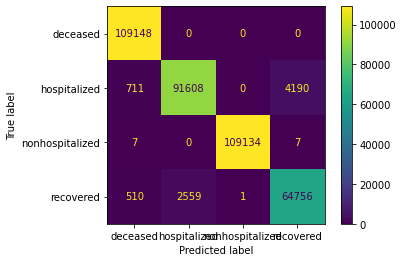

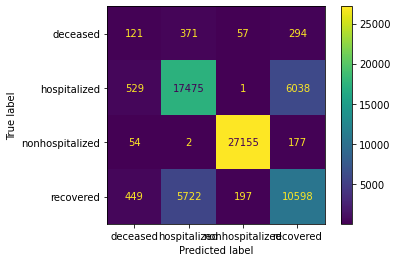

In [ ]:
labels_train = np.unique(y_ros)
labels_test = np.unique(y_test)
plot_confusion_matrix(gs_f, X_ros, y_ros, values_format='d',
                     display_labels=labels_train)
plot_confusion_matrix(gs_f, X_test, y_test, values_format='d',
                     display_labels=labels_test)

In [ ]:
rfc = RandomForestClassifier(random_state=42, class_weight='balanced_subsample', max_depth=35, max_features=0.5, n_estimators=100, n_jobs=-1)
rfc.fit(X_ros, y_ros)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=35,
                       max_features=0.5, n_jobs=-1, random_state=42)

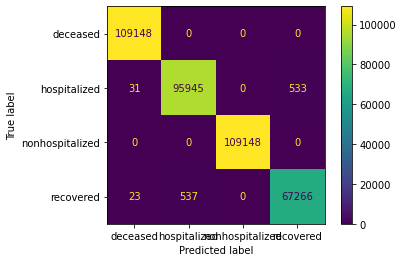

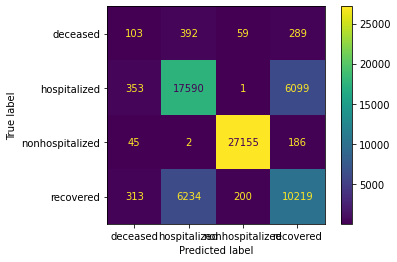

In [ ]:
labels_train = np.unique(y_ros)
labels_test = np.unique(y_test)
plot_confusion_matrix(rfc, X_ros, y_ros, values_format='d',
                     display_labels=labels_train)
plot_confusion_matrix(rfc, X_test, y_test, values_format='d',
                     display_labels=labels_test)

## Final Model Training + Prediction

In [178]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler

# pre-processing, drop unimportant keys

y = df['outcome'].copy()


# dont split data this time
ros = RandomOverSampler(sampling_strategy='minority')
X_final, y_final = ros.fit_resample(X_encoded, y)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [179]:
rf = RandomForestClassifier(random_state=42, class_weight='balanced_subsample', max_depth=30, max_features='sqrt', n_estimators=100, n_jobs=-1)
rf.fit(X_final, y_final)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=30, max_features='sqrt', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

In [180]:
final_predictions = rf.predict(test)

ValueError: ignored

In [ ]:
np.unique(final_predictions, return_counts=True)

(array(['deceased', 'hospitalized', 'nonhospitalized', 'recovered'],
       dtype=object),
 array([ 1377, 17538, 20095,  7490], dtype=int64))

In [ ]:
np.savetxt('predictions.txt', final_predictions, fmt='%s')

In [ ]:
def check_if_file_valid(filename):
    assert filename.endswith('predictions.txt'), 'Incorrect filename'
    f = open(filename).read()
    l = f.split('\n')
    assert len(l) == 46500, 'Incorrect number of items'
    assert (len(set(l)) == 4), 'Wrong class labels'
    return 'The predictions file is valid'
check_if_file_valid('../results/predictions.txt')

'The predictions file is valid'

## Tuning Hyperparameter for XGBoost
params: `max_depth` , `learning_rate`, `gamma`, `reg_lambda`
We will try to find the optimal parameter that improves accuracy with the testing dataset.

In [ ]:
xg_param_grid = {
    'max_depth': [5, 6, 7],
    'learning_rate': [0.1, 0.01, 0.05],
    'gamma': [0, 0.25, 1.0],
    'reg_lambda': [0]
}

optimal_params = GridSearchCV(
    estimator=xgb.XGBClassifier(objective='multi:softmax',
                                seed=42, 
                                n_jobs=-1,
                                num_class=4, 
                                n_estimators=50, 
                                subsample=0.9,
                                colsample_bytree=0.5),
    param_grid=xg_param_grid,
    scoring='f1_weighted',  #['accuracy', 'f1', 'recall'],
    verbose=2,
    n_jobs=-1,
    cv=3
)

optimal_params.fit(X_ros, 
            y_ros,
            verbose=True, 
            early_stopping_rounds=10,
            eval_metric='mlogloss',
            eval_set=[(X_test, y_test)])
print(optimal_params.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
exception calling callback for <Future at 0x2974a94c9d0 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "c:\Users\Leo\Documents\Projects_2\459Project\env\lib\site-packages\joblib\externals\loky\_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "c:\Users\Leo\Documents\Projects_2\459Project\env\lib\site-packages\joblib\parallel.py", line 359, in __call__
    self.parallel.dispatch_next()
  File "c:\Users\Leo\Documents\Projects_2\459Project\env\lib\site-packages\joblib\parallel.py", line 792, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "c:\Users\Leo\Documents\Projects_2\459Project\env\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\Users\Leo\Documents\Projects_2\459Project\env\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(

KeyboardInterrupt: 

In [ ]:
params_df = pd.DataFrame(optimal_params.cv_results_)
print(params_df.params)

xg_param_set1 = params_df.params[0]
print(xg_param_set1)

In [ ]:
xgboost_final_report = pd.DataFrame(columns=('max_depth', 'learning_rate', 'gamma','reg_lambda', 
                                             'F1_deceased', 'Recall_deceased', 'Accuracy', 'Recall'))

In [ ]:
classes_weights = compute_sample_weight('balanced', y_train)

n = len(params_df.params)

for k in range(n):
    xg_param_set = params_df.params[k]
    clf_xgb = xgb.XGBClassifier(objective='multi:softmax', 
                                seed=42, 
                                num_class=4, 
                                n_jobs=-1,
                                n_estimators=50, 
                                subsample=0.9, 
                                colsample_bytree=0.5,
                                max_depth=xg_param_set['max_depth'],
                                gamma=xg_param_set['gamma'],
                                learning_rate=xg_param_set['learning_rate'],
                                reg_lambda=xg_param_set['reg_lambda'])
    clf_xgb.fit(X_train, 
                y_train,
                verbose=False,
                early_stopping_rounds=10,
                eval_metric='mlogloss',
                eval_set=[(X_test, y_test)],
                sample_weight=classes_weights
               )
    # Make predictions using the new model.
    best_train_predictions =clf_xgb.predict(X_train)
    best_test_predictions = clf_xgb.predict(X_test)

    # get reports
    target_names = ['deceased', 'hospitalized', 'non-hosp', 'recovered']
    report = classification_report(best_train_predictions, y_train, target_names=target_names, output_dict=True)

    xgboost_final_report.loc[k] = [xg_param_set['max_depth'], xg_param_set['learning_rate'], xg_param_set['gamma'], xg_param_set['reg_lambda'],
                report['deceased']['f1-score'], report['deceased']['recall'], report['accuracy'], report['weighted avg']['recall']]


In [ ]:

print('The training F1 Score is', f1_score(best_train_predictions, y_train,average=None, labels=['deceased', 'hospitalized', 'recovered', 'nonhospitalized']))
print('The testing F1 Score is', f1_score(best_test_predictions, y_test, average=None))
print(xgboost_final_report)
print(len(xgboost_final_report))

In [ ]:
# export to csv
xgboost_final_report.to_csv ('../results/xgboost_tuning.csv', index = False, header=True)